## Machine learning notebook

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer



## Read in data

In [ ]:
""" 
Pandas here is a bit like Xarray, i.e., it let's us read in data
and maninipulte it aithe statements like data['XYZ'] etc.
"""

file='../Datasets/housing/housing.csv'

housing = pd.read_csv( file )

print("got housing data")



## setting up a new category based on income

In [ ]:
""" 
Set up new income category 'income_cat' as a new key of 'housing'.
See, just like xarray dataset.
Note: median_income is reported as a numerical value [0,14] i.e. 
units of 10K$. Hence the odd bin edges for 'bins'.
"""
housing["income_cat"] = pd.cut( housing["median_income"],
                                bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf],
                                labels=[1, 2, 3, 4, 5] )



""" Naive random split """
train_set_1, test_set_1 =  train_test_split( housing, test_size=0.2, random_state=42 )


""" better splitting that recognizes need to preserve Income stats """
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42 )

for train_index, test_index in split.split( housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set  = housing.loc[test_index]

    



In [ ]:
#print(np.shape(housing))
bins=np.arange(6)*1.0+.5

d0=housing["income_cat"]
hd0=np.histogram(d0,bins=bins)
print(hd0[0]/len(d0))

fig=plt.figure(1)
housing.hist(figsize=(9,9))
#plt.title("Full data")
plt.suptitle("Full data",fontsize=24)
plt.show()
fig=plt.figure(2)
strat_train_set.hist(figsize=(9,9))
plt.suptitle("Training data",fontsize=24)
plt.show()

## Replace 'housing' pd frame with training data

In [ ]:
""" 
Also 'drop' learning target from training set.
Not really sure what these lines do
"""    
housing = strat_train_set.drop("median_house_value", axis=1 )
housing_labels = strat_train_set["median_house_value"].copy()


housing_num = housing.drop("ocean_proximity", axis=1 )


## Fancy plot

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_income", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
#save_fig("housing_prices_scatterplot")


In [29]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


In [30]:
imputer = SimpleImputer( strategy = "median" )

imputer.fit( housing_num )

X=imputer.transform( housing_num )  # X is an np ndarray


In [33]:
print(np.shape(X))
print(X[0:10,:])

(16512, 9)
[[-1.2146e+02  3.8520e+01  2.9000e+01  3.8730e+03  7.9700e+02  2.2370e+03
   7.0600e+02  2.1736e+00  2.0000e+00]
 [-1.1723e+02  3.3090e+01  7.0000e+00  5.3200e+03  8.5500e+02  2.0150e+03
   7.6800e+02  6.3373e+00  5.0000e+00]
 [-1.1904e+02  3.5370e+01  4.4000e+01  1.6180e+03  3.1000e+02  6.6700e+02
   3.0000e+02  2.8750e+00  2.0000e+00]
 [-1.1713e+02  3.2750e+01  2.4000e+01  1.8770e+03  5.1900e+02  8.9800e+02
   4.8300e+02  2.2264e+00  2.0000e+00]
 [-1.1870e+02  3.4280e+01  2.7000e+01  3.5360e+03  6.4600e+02  1.8370e+03
   5.8000e+02  4.4964e+00  3.0000e+00]
 [-1.2204e+02  3.7960e+01  2.8000e+01  1.2070e+03  2.5200e+02  7.2400e+02
   2.5200e+02  3.6964e+00  3.0000e+00]
 [-1.2203e+02  3.7330e+01  2.3000e+01  4.2210e+03  6.7100e+02  1.7820e+03
   6.4100e+02  7.4863e+00  5.0000e+00]
 [-1.1831e+02  3.4200e+01  3.6000e+01  1.6920e+03  2.6300e+02  7.7800e+02
   2.7800e+02  5.0865e+00  4.0000e+00]
 [-1.2195e+02  3.7270e+01  1.7000e+01  1.3300e+03  2.7100e+02  4.0800e+02
   2.5800e+

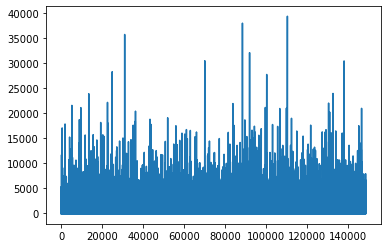